In [ ]:
# Fazer tratamento de dados de um planilha

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
dataset = pd.read_csv("tempo.csv", sep = ";")
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [3]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

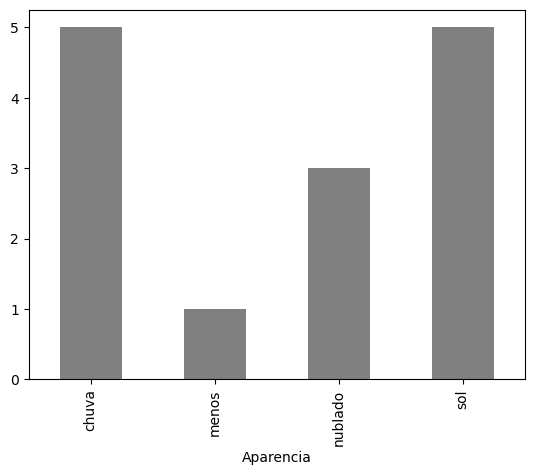

In [4]:
agrupado.plot.bar(color = "gray")

In [5]:
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

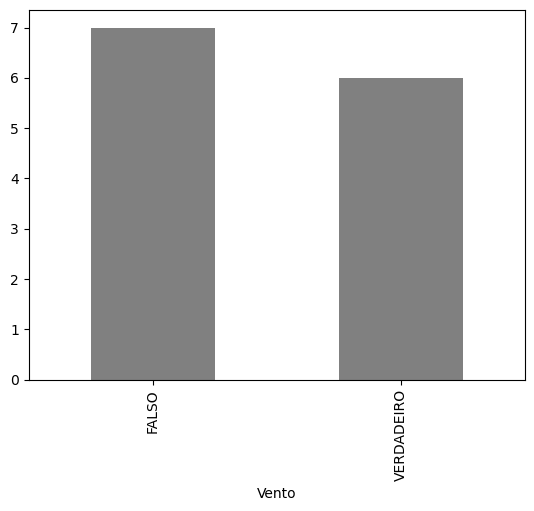

In [6]:
agrupado.plot.bar(color = 'gray')

In [7]:
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

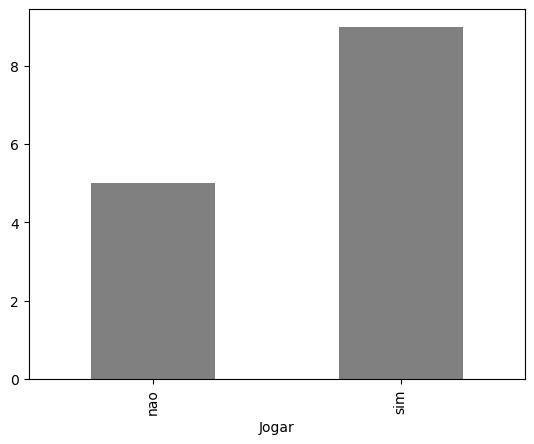

In [8]:
agrupado.plot.bar(color='gray')

In [9]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

AttributeError: 'Axes' object has no attribute 'set_little'

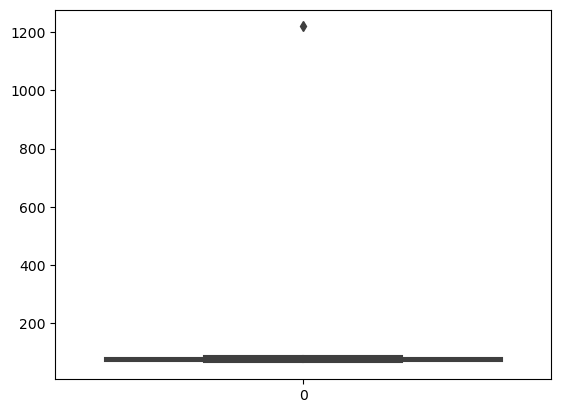

In [11]:
srn.boxplot(dataset['Temperatura']).set_little('Temperatura')

C:\Users\Breno\AppData\Local\Temp\ipykernel_15016\4118072886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Temperatura']).set_little('Temperatura')
C:\Users\Breno\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'Axes' object has no attribute 'set_little'

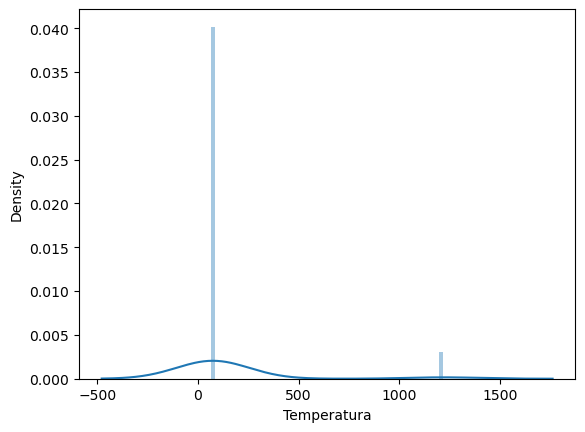

In [12]:
srn.distplot(dataset['Temperatura']).set_little('Temperatura')

In [13]:
#Verificar quantos Nas tem na base de dados
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [14]:
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [16]:
#Transformando 'Menos' em "SOL'
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'Sol'
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
Sol        1
chuva      5
nublado    3
sol        5
dtype: int64

In [17]:
#Temperatura fora do dominio
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [18]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [20]:
#Calular a mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [25]:
#Substituir
mediana = int(mediana)
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130), 'Temperatura'] = mediana
mediana

73

In [26]:
dataset.loc[(dataset['Temperatura'] <  -130 )  | ( dataset['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [27]:
# Analisando 'Umidade'
agrupado = dataset.groupby(['Umidade']).size()
agrupado

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [28]:
dataset['Umidade'].isnull().sum()

1

In [29]:
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [30]:
# Transformar as Nas em mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [31]:
# Verificando
dataset['Umidade'].isnull().sum()

0

In [32]:
# Umidade fora do dominio (200)
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [33]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100), 'Umidade'] = mediana

In [34]:
dataset.loc[(dataset['Umidade'] <  0 )  | ( dataset['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [35]:
# Ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [36]:
dataset['Vento'].isnull().sum()

1

In [37]:
dataset['Vento'].fillna('FALSO', inplace=True)

In [38]:
dataset['Vento'].isnull().sum()

0